In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from nbodykit.lab import *
from nbodykit import setup_logging, style
setup_logging()

Steps to create a catalog
* define a number density, boxsize, and nmesh 
* Define a cosmology
* Calculate the linear power spectrum
* Make a catalog


# Making the catalog

In [9]:
#PARAMS
z = 1
nbar = 3e-3
nmesh = 128
boxsize = 400

# COSMOLOGY
cosmo = cosmology.Planck15
plin  = cosmology.LinearPower(cosmo, z)


cat = LogNormalCatalog(Plin=plin, nbar=nbar, BoxSize=boxsize, Nmesh=nmesh, cosmo=cosmo)

[ 000254.50 ]   0: 04-13 09:52  LogNormalCatalog INFO     Growth Rate is 0.871127
[ 000254.50 ]   0: 04-13 09:52  LogNormalCatalog INFO     Generating whitenoise
[ 000255.01 ]   0: 04-13 09:52  LogNormalCatalog INFO     Write noise generated
[ 000257.72 ]   0: 04-13 09:52  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000257.80 ]   0: 04-13 09:52  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.2643429420317942
[ 000257.98 ]   0: 04-13 09:52  LogNormalCatalog INFO     Displacement computed in configuration space: std = [3.461063150230405, 3.1723443045862503, 3.2818790377793823]
[ 000257.99 ]   0: 04-13 09:52  LogNormalCatalog INFO     gaussian field is generated
[ 000258.00 ]   0: 04-13 09:52  LogNormalCatalog INFO     Lognormal transformation done
[ 000258.21 ]   0: 04-13 09:52  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 192074
[ 000258.71 ]   0: 04-13 09:52  LogNormalCatalog INFO     catalog produced

QUESTIONS
* What determines the nbar, is it experimentally known?
* What is Bias?

# Catalog Properties

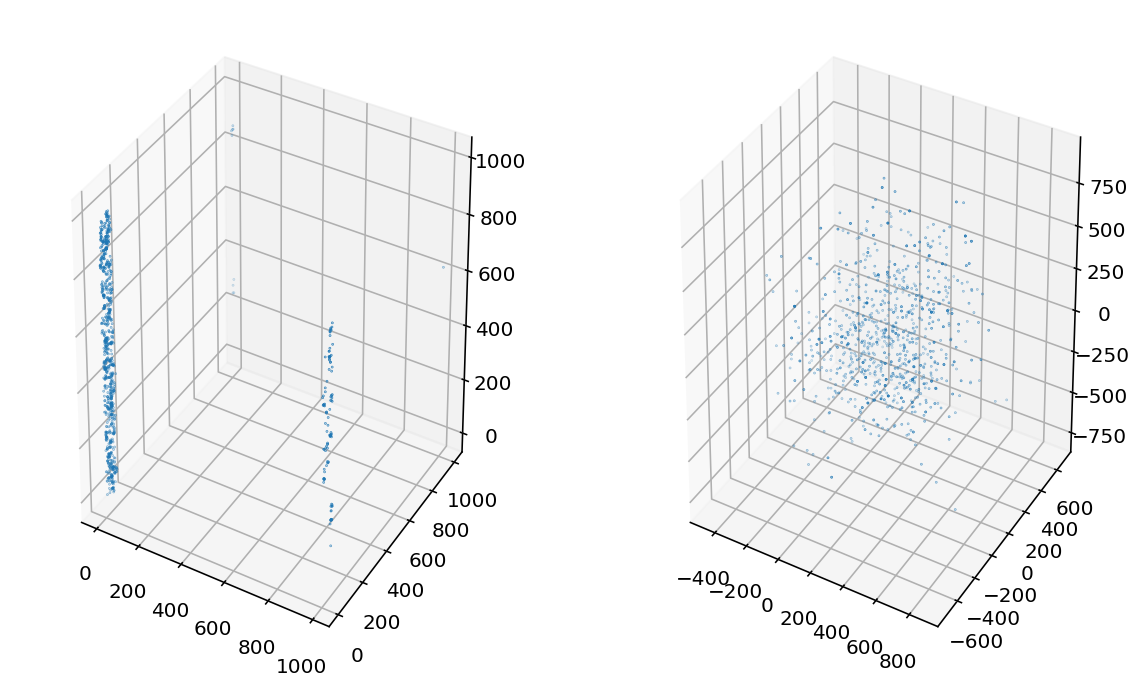

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121, projection='3d')
xs = cat['Position'][:1000, 0]
ys = cat['Position'][:1000, 1]
zs = cat['Position'][:1000, 2]

ax.scatter(xs, ys, zs, s=.1)

ax = fig.add_subplot(122, projection='3d')
xs = cat['Velocity'][:1000, 0]
ys = cat['Velocity'][:1000, 1]
zs = cat['Velocity'][:1000, 2]

ax.scatter(xs, ys, zs, s=.1)

plt.show()

# Power Spectrum

* Convert to a mesh, 
* Define number of $\mu$ bins
* use FFTPower

In [10]:
mesh = cat.to_mesh(interlaced=False, compensated=True, resampler='cic')

# 1D power
power_1d = FFTPower(mesh, '1d')

# 2D power
power_2d = FFTPower(mesh, '2d', Nmu=10)

# Extract power dict
pk_1d = power_1d.power
pk_2d = power_2d.power

[ 000509.11 ]   0: 04-13 09:56  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 192074 
[ 000509.61 ]   0: 04-13 09:56  CatalogMesh     INFO     painted 192074 out of 192074 objects to mesh
[ 000509.61 ]   0: 04-13 09:56  CatalogMesh     INFO     painted 192074 out of 192074 objects to mesh
[ 000509.61 ]   0: 04-13 09:56  CatalogMesh     INFO     mean particles per cell is 0.091588
[ 000509.61 ]   0: 04-13 09:56  CatalogMesh     INFO     sum is 192074 
[ 000509.61 ]   0: 04-13 09:56  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000509.66 ]   0: 04-13 09:56  CatalogMesh     INFO     field: (LogNormalCatalog(seed=2744297320, bias=2) as CatalogMesh) painting done
[ 000509.78 ]   0: 04-13 09:56  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 192074 
[ 000509.89 ]   0: 04-13 09:56  CatalogMesh     INFO     painted 192074 out of 192074 objects to mesh
[ 000509.89 ]   0: 04-13 09:56  CatalogMesh     INFO     painted 192074 out of 192074 objects to mesh
[ 000509.90 ]   0: 04-13

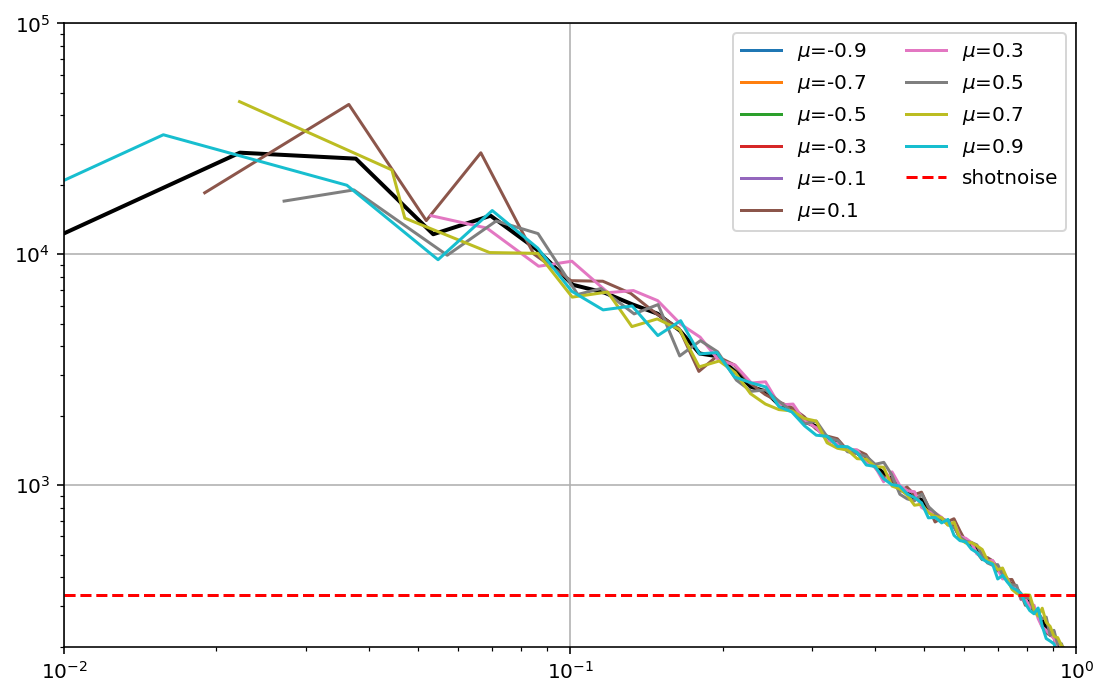

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.loglog(pk_1d['k'][:], pk_1d['power'][:].real-pk_1d.attrs['shotnoise'], 'k', lw=2)
for mu in range(pk_2d.shape[1]):
    ax.loglog(pk_2d['k'][:, mu],pk_2d['power'][:, mu].real - pk_2d.attrs['shotnoise'], label=r'$\mu$=%.1f'%pk_2d.coords['mu'][mu])
ax.grid()
ax.set_xlim(1e-2, 1)
ax.set_ylim(2e2, 1e5)
ax.axhline(pk_2d.attrs['shotnoise'],color='r', ls='--', label='shotnoise')
ax.legend(ncol=2)


plt.tight_layout()

# Halo Finder

* nbodykit has a friends of friends function so just use that with the catalog

In [12]:
#PARAMS
z = 1
nbar = 3e-3
nmesh = 256
boxsize = 400

# COSMOLOGY
cosmo = cosmology.Planck15
plin  = cosmology.LinearPower(cosmo, z)


cat = LogNormalCatalog(Plin=plin, nbar=nbar, BoxSize=boxsize, Nmesh=nmesh, cosmo=cosmo)

[ 000518.52 ]   0: 04-13 09:56  LogNormalCatalog INFO     Growth Rate is 0.871127
[ 000518.52 ]   0: 04-13 09:56  LogNormalCatalog INFO     Generating whitenoise
[ 000522.04 ]   0: 04-13 09:56  LogNormalCatalog INFO     Write noise generated
[ 000542.44 ]   0: 04-13 09:57  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000543.02 ]   0: 04-13 09:57  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.692399929023909
[ 000544.47 ]   0: 04-13 09:57  LogNormalCatalog INFO     Displacement computed in configuration space: std = [3.2541420291321277, 3.3329475815408243, 3.3615809095644047]
[ 000544.49 ]   0: 04-13 09:57  LogNormalCatalog INFO     gaussian field is generated
[ 000544.58 ]   0: 04-13 09:57  LogNormalCatalog INFO     Lognormal transformation done
[ 000546.27 ]   0: 04-13 09:57  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 191312
[ 000551.28 ]   0: 04-13 09:57  LogNormalCatalog INFO     catalog produced

In [4]:
# Define a linking length and minimum particle number
linking_length=.2
nmin=5

fof = FOF(cat, nmin=nmin, linking_length=linking_length)

[ 000039.68 ]   0: 04-09 12:57  FOF             INFO     Number of particles max/min = 191869 / 191869 before spatial decomposition
[ 000039.79 ]   0: 04-09 12:57  FOF             INFO     Number of particles max/min = 191869 / 191869 after spatial decomposition


In [5]:
features  = fof.find_features()

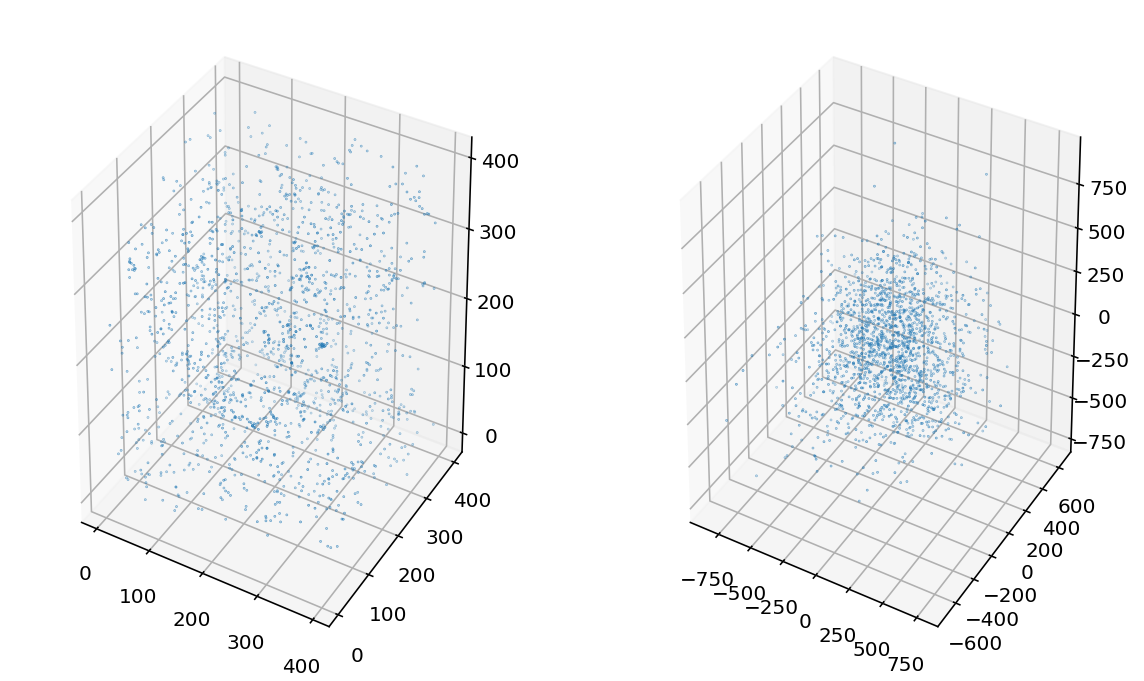

In [6]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121, projection='3d')
xs = features['CMPosition'][:, 0]
ys = features['CMPosition'][:, 1]
zs = features['CMPosition'][:, 2]

ax.scatter(xs, ys, zs, s=.1, cmap=cat['Weight'])

ax = fig.add_subplot(122, projection='3d')
xs = features['CMVelocity'][:, 0]
ys = features['CMVelocity'][:, 1]
zs = features['CMVelocity'][:, 2]

ax.scatter(xs, ys, zs, s=.1)

plt.show()

To get this to halos, use to_halos
* Set particle mass = $10^{12}M_\odot/h$
* "Here, ‘vir’ specifies that we wish to create the Mass column as the virial mass. This mass definition is necessary for computing the analytic concentration, needed when generating the HOD galaxies."

In [7]:
particle_mass = 1e12
mdef='vir'

halos = fof.to_halos(particle_mass, cosmo, z, mdef)

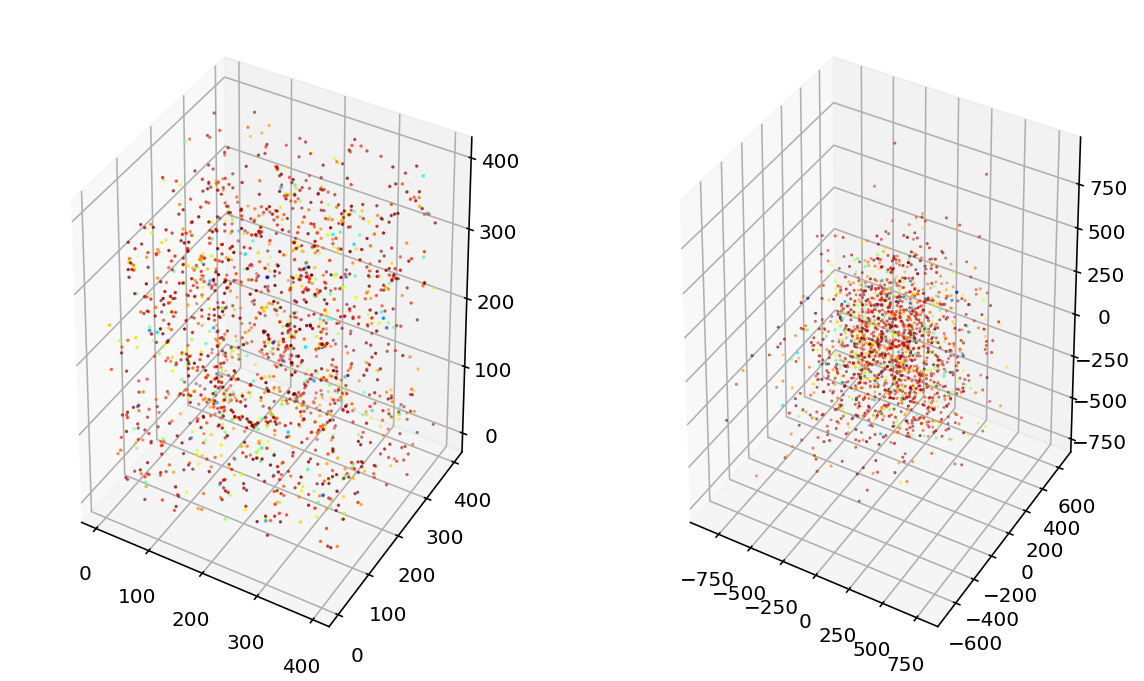

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121, projection='3d')
xs = halos['Position'][:, 0]
ys = halos['Position'][:, 1]
zs = halos['Position'][:, 2]

ax.scatter(xs, ys, zs, c=halos['Concentration']/halos['Concentration'].max(), s=halos['Radius']/halos['Radius'].max(), cmap='jet', norm=LogNorm())
ax = fig.add_subplot(122, projection='3d')
xs = halos['Velocity'][:, 0]
ys = halos['Velocity'][:, 1]
zs = halos['Velocity'][:, 2]

ax.scatter(xs, ys, zs,  c=halos['Concentration'], s=halos['Radius'], cmap='jet', norm=LogNorm())

plt.show()

Now put them in the halo catolog

In [9]:
halo_cat = halos.to_halotools()

In [10]:
halo_cat.halo_table[:20]

halo_x,halo_y,halo_z,halo_vx,halo_vy,halo_vz,halo_mvir,halo_rvir,halo_nfw_conc,halo_id,halo_hostid,halo_upid,halo_local_id
float32,float32,float32,float32,float32,float32,float64,float64,float64,int64,int64,float64,int64
127.75806,351.8885,59.95041,351.4296,216.83096,286.44144,68000000000000.0,0.4896575560763511,4.377614315005651,0,0,-1.0,0
184.30128,222.43297,168.12094,116.26256,11.46315,-83.8757,57000000000000.0,0.46168713706673986,4.434368515255886,1,1,-1.0,1
278.12875,42.26705,375.2352,-487.5115,-194.12419,259.24588,48000000000000.0,0.43598334811004974,4.490348374591695,2,2,-1.0,2
101.71929,226.515,56.820816,23.149336,-37.52832,192.74847,45000000000000.0,0.42670427540112343,4.511553720242916,3,3,-1.0,3
343.5152,104.03146,57.257114,-70.343704,-19.560972,4.736702,44000000000000.0,0.42351979645755455,4.518961081777301,4,4,-1.0,4
310.42056,376.87134,149.20755,-360.85785,88.64523,-121.93603,44000000000000.0,0.42351979645755455,4.518961081777301,5,5,-1.0,5
230.124,383.35846,197.94942,-155.44771,296.41443,44.616302,42000000000000.0,0.4170030708846118,4.534333385109173,6,6,-1.0,6
230.78114,101.377106,394.07492,83.97738,55.40026,205.0557,40000000000000.0,0.41027603856373623,4.550512033134684,7,7,-1.0,7
57.95468,171.05038,15.7872505,76.723434,34.998463,289.27155,39000000000000.0,0.40682817775182467,4.55893006610427,8,8,-1.0,8


In [36]:
from nbodykit.hod import Hearin15Model, Leauthaud11Model, Zheng07Model

In [46]:
HOD_cat = halos.populate(Leauthaud11Model)

[ 009373.25 ]   0: 04-09 15:32  CatalogSource   INFO     satellite fraction: 0.26
[ 009373.25 ]   0: 04-09 15:32  CatalogSource   INFO     populated 1992 objects into 1714 halos
[ 009373.25 ]   0: 04-09 15:32  CatalogSource   INFO     mean log10 halo mass: 13.00
[ 009373.26 ]   0: 04-09 15:32  CatalogSource   INFO     std log10 halo mass: 0.22


In [47]:
cen = HOD_cat['gal_type']==0
sat = HOD_cat['gal_type']==1

cens=HOD_cat[cen]
sats=HOD_cat[sat]

# Halo Power Spectrum

In [48]:
power_1d = FFTPower(halos, mode='1d', Nmesh=nmesh)
power_cen = FFTPower(cens, mode='1d', Nmesh=nmesh)
power_sat = FFTPower(sats, mode='1d', Nmesh=nmesh)
power_hod = FFTPower(HOD_cat, mode='1d', Nmesh=nmesh)

cross_cen_sat = FFTPower(cens, second=sats, mode='1d', Nmesh=nmesh)

[ 009374.92 ]   0: 04-09 15:32  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 1714 
[ 009375.07 ]   0: 04-09 15:32  CatalogMesh     INFO     painted 1714 out of 1714 objects to mesh
[ 009375.09 ]   0: 04-09 15:32  CatalogMesh     INFO     painted 1714 out of 1714 objects to mesh
[ 009375.09 ]   0: 04-09 15:32  CatalogMesh     INFO     mean particles per cell is 0.000102162
[ 009375.09 ]   0: 04-09 15:32  CatalogMesh     INFO     sum is 1714 
[ 009375.13 ]   0: 04-09 15:32  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 009375.48 ]   0: 04-09 15:32  CatalogMesh     INFO     field: (HaloCatalog(size=1714) as CatalogMesh) painting done
[ 009376.14 ]   0: 04-09 15:32  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 1477 
[ 009376.25 ]   0: 04-09 15:32  CatalogMesh     INFO     painted 1477 out of 1477 objects to mesh
[ 009376.26 ]   0: 04-09 15:32  CatalogMesh     INFO     painted 1477 out of 1477 objects to mesh
[ 009376.26 ]   0: 04-09 15:32  CatalogMesh     INFO     mean 

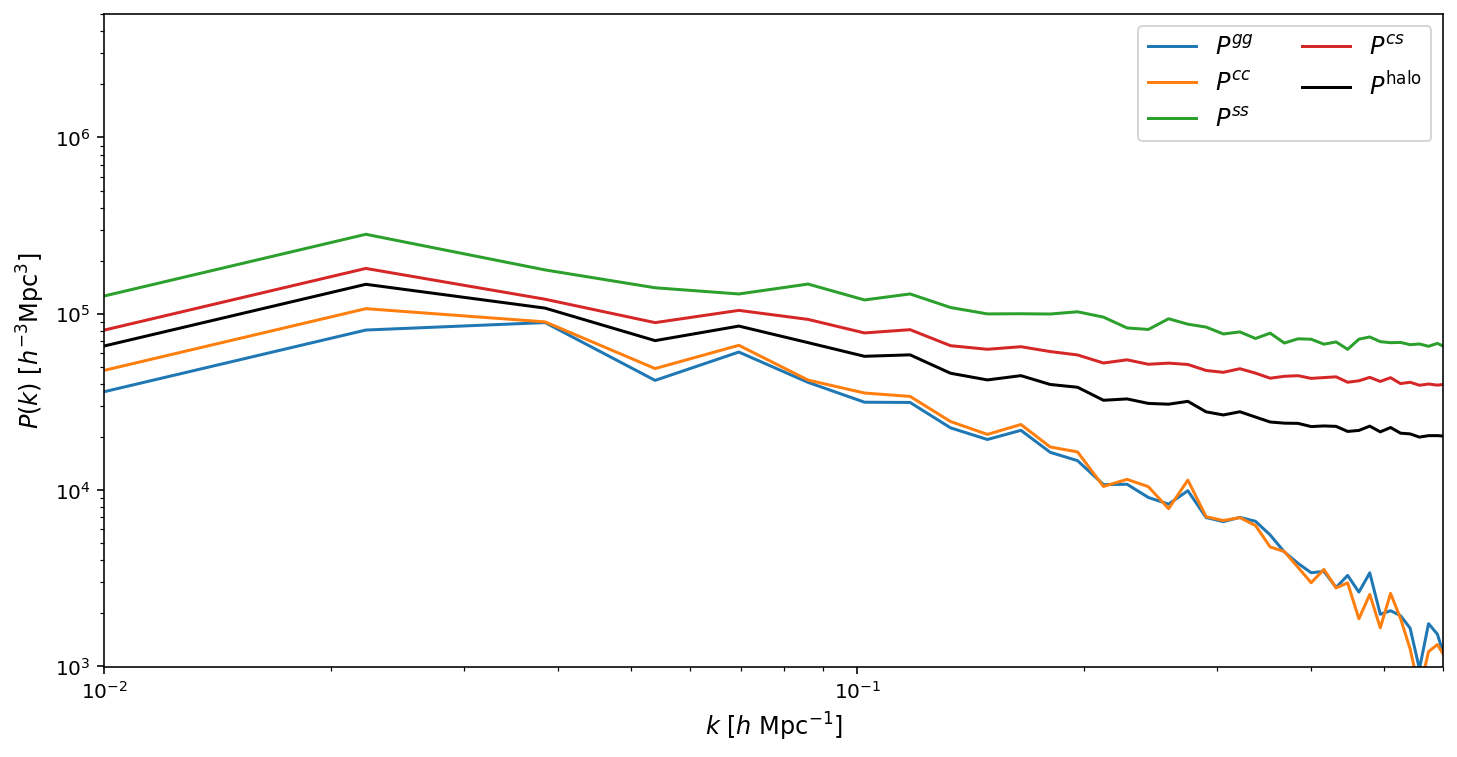

In [49]:
# plot galaxy auto power, centrals auto power, and sats auto power
plt.figure(figsize=(12, 6))
labels = [r"$P^{gg}$", r"$P^{cc}$", r"$P^{ss}$"]
for i, r in enumerate([power_1d, power_cen, power_sat]):
    Pk = r.power
    plt.loglog(Pk['k'], Pk['power'].real-Pk.attrs['shotnoise'], label=labels[i])


# central-satellite power
Pk = cross_cen_sat.power
plt.loglog(Pk['k'], Pk['power'].real, label=r"$P^{cs}$")

# the halo power
Phalo = power_hod.power
plt.loglog(Phalo['k'], Phalo['power'].real-Phalo.attrs['shotnoise'], c='k', label=r"$P^\mathrm{halo}$")
# add a legend and axis labels
plt.legend(loc=0, ncol=2, fontsize=12)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]", fontsize=12)
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=12)
plt.xlim(0.01, 0.6)
plt.ylim(1e3, 5e6)
plt.show()